# Building the Hank.ai Darknet/YOLO Framework
- Using the [Hank.ai Darknet/YOLO repo](https://github.com/hank-ai/darknet#table-of-contents)
- Based on https://github.com/hank-ai/darknet#linux-cmake-method
- See the [Darknet/YOLO FAQ](https://www.ccoderun.ca/programming/yolo_faq/)
- Last updated by Stéphane Charette on 2024-06-07 for Darknet v2.0-225
- Remember to select:  Edit -> Notebook settings -> T4 GPU

# Install the dependencies

In [27]:
# First part will install the tools we'll use to build.
!sudo apt-get install build-essential git libopencv-dev cmake

# Next few lines is for NVIDIA software.
!apt-cache search libcudnn9
!apt-cache search cuda-libraries-12
!sudo apt-get install libcudnn9-dev-cuda-12 cuda-libraries-dev-12-2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
git is already the newest version (1:2.34.1-1ubuntu1.11).
libopencv-dev is already the newest version (4.5.4+dfsg-9ubuntu4+jammy0).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
libcudnn9-cuda-11 - cuDNN runtime libraries for CUDA 11.8
libcudnn9-dev-cuda-11 - cuDNN development headers and symlinks for CUDA 11.8
libcudnn9-samples - cuDNN samples
libcudnn9-static-cuda-11 - cuDNN static libraries for CUDA 11.8
libcudnn9-cuda-12 - cuDNN runtime libraries for CUDA 12.4
libcudnn9-dev-cuda-12 - cuDNN development headers and symlinks for CUDA 12.4
libcudnn9-static-cuda-12 - cuDNN static libraries for CUDA 12.4
cuda-libraries-12-0 - CUDA Libraries 12.0 meta-package
cuda-libraries-12-1 - CUDA Libraries 12.1 meta-package
cuda-libraries-12-2 - CUDA Libraries 12.2

# Verifying NVIDIA

In [43]:
# There are 2 specific tools from NVIDIA we're going to use to verify that everything is installed.

# The first is nvidia-smi which gives real-time information in the GPU.
!nvidia-smi

# Next is the nvidia compiler.  If you get a "command not found" error then things will not work!
!nvcc --version

Fri Jun  7 13:59:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Cloning the Darknet/YOLO repo

In [32]:
# Remove any pre-existing repo files, and clone the Darknet/YOLO repo from Hank.ai.
%mkdir -p ~/src
%cd ~/src
%rm -rf ~/src/darknet
!git clone https://github.com/hank-ai/darknet

/root/src
Cloning into 'darknet'...
remote: Enumerating objects: 17896, done.
remote: Counting objects: 100% (2368/2368), done.
remote: Compressing objects: 100% (735/735), done.
remote: Total 17896 (delta 1741), reused 2236 (delta 1624), pack-reused 15528
Receiving objects: 100% (17896/17896), 17.98 MiB | 14.10 MiB/s, done.
Resolving deltas: 100% (12213/12213), done.


# Preparing to build the Darknet/YOLO repo

In [44]:
# Prepare the Darknet/YOLO build directory
%cd ~/src/darknet
%rm -rf ~/src/darknet/build
%mkdir ~/src/darknet/build
%cd ~/src/darknet/build
!cmake -DCMAKE_BUILD_TYPE=Release ..

# Once cmake has finished, make sure that CUDA and cuDNN are working.  The output should contain lines such as:
#     "CUDA detected. Darknet will use the GPU."
# and
#     "Enabling cuDNN"

/root/src/darknet
/root/src/darknet/build
-- Darknet v2.0-225-g277ed9f4-dirty
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Looking for a CUDA compiler
-- Looking for a CUDA compiler - /usr/local/cuda/bin/nvcc
-- CUDA detected. Darknet will use the GPU.
-- The CUDA compiler identification is NVIDIA 12.2.140
-- Detecting CUDA compiler ABI info
-- Detecting CUDA compiler ABI info - done
-- Check for working CUDA compiler: /usr/local/cuda/bin/nvcc - skipped
-- Detecting CUDA compile features
-- Detecting CUDA compile features - done
--

# Building and installing Darknet/YOLO files

In [45]:
# Build Darknet/YOLO
%cd ~/src/darknet/build
!make -j $(nproc)

/root/src/darknet/build
/usr/local/lib/python3.10/dist-packages/cmake/data/bin/cmake -S/root/src/darknet -B/root/src/darknet/build --check-build-system CMakeFiles/Makefile.cmake 0
/usr/local/lib/python3.10/dist-packages/cmake/data/bin/cmake -E cmake_progress_start /root/src/darknet/build/CMakeFiles /root/src/darknet/build//CMakeFiles/progress.marks
make  -f CMakeFiles/Makefile2 all
make[1]: Entering directory '/root/src/darknet/build'
make  -f src-lib/CMakeFiles/darknetobjlib.dir/build.make src-lib/CMakeFiles/darknetobjlib.dir/depend
make[2]: Entering directory '/root/src/darknet/build'
cd /root/src/darknet/build && /usr/local/lib/python3.10/dist-packages/cmake/data/bin/cmake -E cmake_depends "Unix Makefiles" /root/src/darknet /root/src/darknet/src-lib /root/src/darknet/build /root/src/darknet/build/src-lib /root/src/darknet/build/src-lib/CMakeFiles/darknetobjlib.dir/DependInfo.cmake "--color="
make[2]: Leaving directory '/root/src/darknet/build'
make  -f src-lib/CMakeFiles/darknetobjl

In [50]:
# Confirm that the Darknet CLI was built correctly
%cd ~/src/darknet/build
!src-cli/darknet version

/root/src/darknet/build
Darknet v2.0-225-g277ed9f4-dirty
CUDA runtime version 12020 (v12.2), driver version 12020 (v12.2)
cuDNN version 12040 (v9.1.1), use of half-size floats is ENABLED
=> 0: Tesla T4 [#7.5], 14.7 GiB
OpenCV v4.5.4


In [51]:
# Create and install the .deb installation package
%cd ~/src/darknet/build
!make package
!sudo dpkg -i darknet-2*.deb

/root/src/darknet/build
/usr/local/lib/python3.10/dist-packages/cmake/data/bin/cmake -S/root/src/darknet -B/root/src/darknet/build --check-build-system CMakeFiles/Makefile.cmake 0
/usr/local/lib/python3.10/dist-packages/cmake/data/bin/cmake -E cmake_progress_start /root/src/darknet/build/CMakeFiles /root/src/darknet/build//CMakeFiles/progress.marks
make  -f CMakeFiles/Makefile2 all
make[1]: Entering directory '/root/src/darknet/build'
make  -f src-lib/CMakeFiles/darknetobjlib.dir/build.make src-lib/CMakeFiles/darknetobjlib.dir/depend
make[2]: Entering directory '/root/src/darknet/build'
cd /root/src/darknet/build && /usr/local/lib/python3.10/dist-packages/cmake/data/bin/cmake -E cmake_depends "Unix Makefiles" /root/src/darknet /root/src/darknet/src-lib /root/src/darknet/build /root/src/darknet/build/src-lib /root/src/darknet/build/src-lib/CMakeFiles/darknetobjlib.dir/DependInfo.cmake "--color="
make[2]: Leaving directory '/root/src/darknet/build'
make  -f src-lib/CMakeFiles/darknetobjl

In [52]:
# Confirm that we can run "darknet" from anywhere since it has now been installed
%cd ~
!darknet version
# Show some of the /opt/ files we've installed.  This should show ~40 .cfg files.
!ls -lh /opt/darknet/cfg/yolov*

/root
Darknet v2.0-225-g277ed9f4-dirty
CUDA runtime version 12020 (v12.2), driver version 12020 (v12.2)
cuDNN version 12040 (v9.1.1), use of half-size floats is ENABLED
=> 0: Tesla T4 [#7.5], 14.7 GiB
OpenCV v4.5.4
-rw-r--r-- 1 root root 2.7K Jun  7 13:44 /opt/darknet/cfg/yolov2.cfg
-rw-r--r-- 1 root root 1.5K Jun  7 13:44 /opt/darknet/cfg/yolov2-tiny.cfg
-rw-r--r-- 1 root root 1.5K Jun  7 13:44 /opt/darknet/cfg/yolov2-tiny-voc.cfg
-rw-r--r-- 1 root root 2.7K Jun  7 13:44 /opt/darknet/cfg/yolov2-voc.cfg
-rw-r--r-- 1 root root  11K Jun  7 13:44 /opt/darknet/cfg/yolov3_5l.cfg
-rw-r--r-- 1 root root 8.2K Jun  7 13:44 /opt/darknet/cfg/yolov3.cfg
-rw-r--r-- 1 root root 8.5K Jun  7 13:44 /opt/darknet/cfg/yolov3.coco-giou-12.cfg
-rw-r--r-- 1 root root 8.2K Jun  7 13:44 /opt/darknet/cfg/yolov3-openimages.cfg
-rw-r--r-- 1 root root 8.5K Jun  7 13:44 /opt/darknet/cfg/yolov3-spp.cfg
-rw-r--r-- 1 root root 2.4K Jun  7 13:44 /opt/darknet/cfg/yolov3-tiny_3l.cfg
-rw-r--r-- 1 root root 1.9K Jun  7 13:

# Building and installing DarkHelp

In [40]:
# Build and install the DarkHelp CLI

!sudo apt-get install build-essential libtclap-dev libmagic-dev libopencv-dev
%cd ~/src
%rm -rf ~/src/DarkHelp
!git clone https://github.com/stephanecharette/DarkHelp.git
%cd ~/src/DarkHelp
%mkdir build
%cd build
!cmake -DCMAKE_BUILD_TYPE=Release ..
!make -j $(nproc)
!make package
!sudo dpkg -i darkhelp*.deb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
libopencv-dev is already the newest version (4.5.4+dfsg-9ubuntu4+jammy0).
The following NEW packages will be installed:
  libmagic-dev libtclap-dev
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,683 kB of archives.
After this operation, 15.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libmagic-dev amd64 1:5.41-3ubuntu0.1 [105 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtclap-dev amd64 1.2.5-1 [2,578 kB]
Fetched 2,683 kB in 1s (2,775 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initia

# Test the MSCOCO Weights

/root/src/darknet
File ‘yolov4-tiny.weights’ already there; not retrieving.

-> config file:  cfg/yolov4-tiny.cfg
-> weights file: yolov4-tiny.weights
-> names file:   cfg/coco.names
-> driver:       Darknetd
 Try to load cfg: cfg/yolov4-tiny.cfg, weights: yolov4-tiny.weights, clear = 1 
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  3

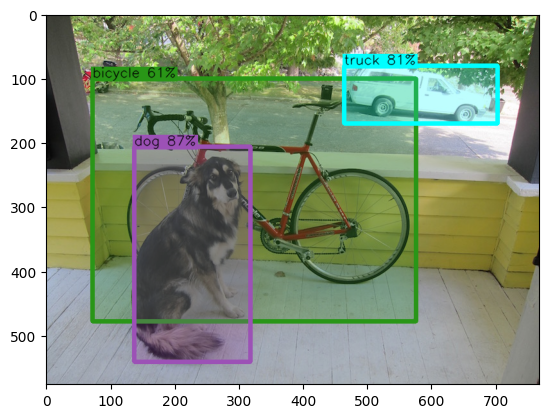

In [53]:
# Download the MSCOCO pre-trained weights (https://github.com/hank-ai/darknet#mscoco-pre-trained-weights)
%cd ~/src/darknet
!wget --no-clobber https://github.com/hank-ai/darknet/releases/download/v2.0/yolov4-tiny.weights

# This is what the command looks like when using Darknet to predict.  Because we're using --dont-show, the results will be saved as an image to "predictions.jpg"
#!darknet detector test --dont-show cfg/coco.data cfg/yolov4-tiny.cfg yolov4-tiny.weights artwork/dog.jpg

# And this how we do the equivalent but with DarkHelp instead.  See the DarkHelp documentation to see all the options which alter the look of the output image.
# https://www.ccoderun.ca/darkhelp/api/Parameters.html
!DarkHelp --json --autohide off --keep --duration off --fontscale 0.7 --line 5 --shade 0.25 --threshold 0.5 --outdir . cfg/yolov4-tiny.cfg cfg/coco.names yolov4-tiny.weights artwork/dog.jpg

# Display the results
import cv2 as cv2
from matplotlib import pyplot as plt

img = cv2.imread('dog.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


# All done!

At this point, you'd need to upload your dataset, and then call `darknet detector train ...` to begin training your neural network.

Also see:
- https://www.ccoderun.ca/programming/yolo_faq/#training_command
- https://github.com/hank-ai/darknet#training